In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('insurance_claims.csv')
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

 # Feature Engg.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df["authorities_contacted"].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encd= LabelEncoder()
enc_features=["authorities_contacted","policy_csl","insured_sex","insured_education_level","insured_occupation","insured_relationship","incident_type",
              "collision_type","incident_severity","property_damage","police_report_available","fraud_reported","policy_bind_date","auto_make","auto_model","insured_hobbies","incident_date","incident_state","incident_city",
             "incident_location","policy_state"]
for feature in enc_features:
    df[feature] = label_encd.fit_transform(df[feature])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int32  
 4   policy_state                 1000 non-null   int32  
 5   policy_csl                   1000 non-null   int32  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int32  
 11  insured_education_level      1000 non-null   int32  
 12  insured_occupation           1000 non-null   int32  
 13  insured_hobbies    

In [11]:
df = df.drop("_c39", axis=1)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int32  
 4   policy_state                 1000 non-null   int32  
 5   policy_csl                   1000 non-null   int32  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int32  
 11  insured_education_level      1000 non-null   int32  
 12  insured_occupation           1000 non-null   int32  
 13  insured_hobbies    

In [12]:
df["fraud_reported"].isna().sum()

0

In [13]:
df["fraud_reported"].value_counts().to_dict()

{0: 753, 1: 247}

In [14]:
df["police_report_available"].value_counts().to_dict()


{0: 343, 1: 343, 2: 314}

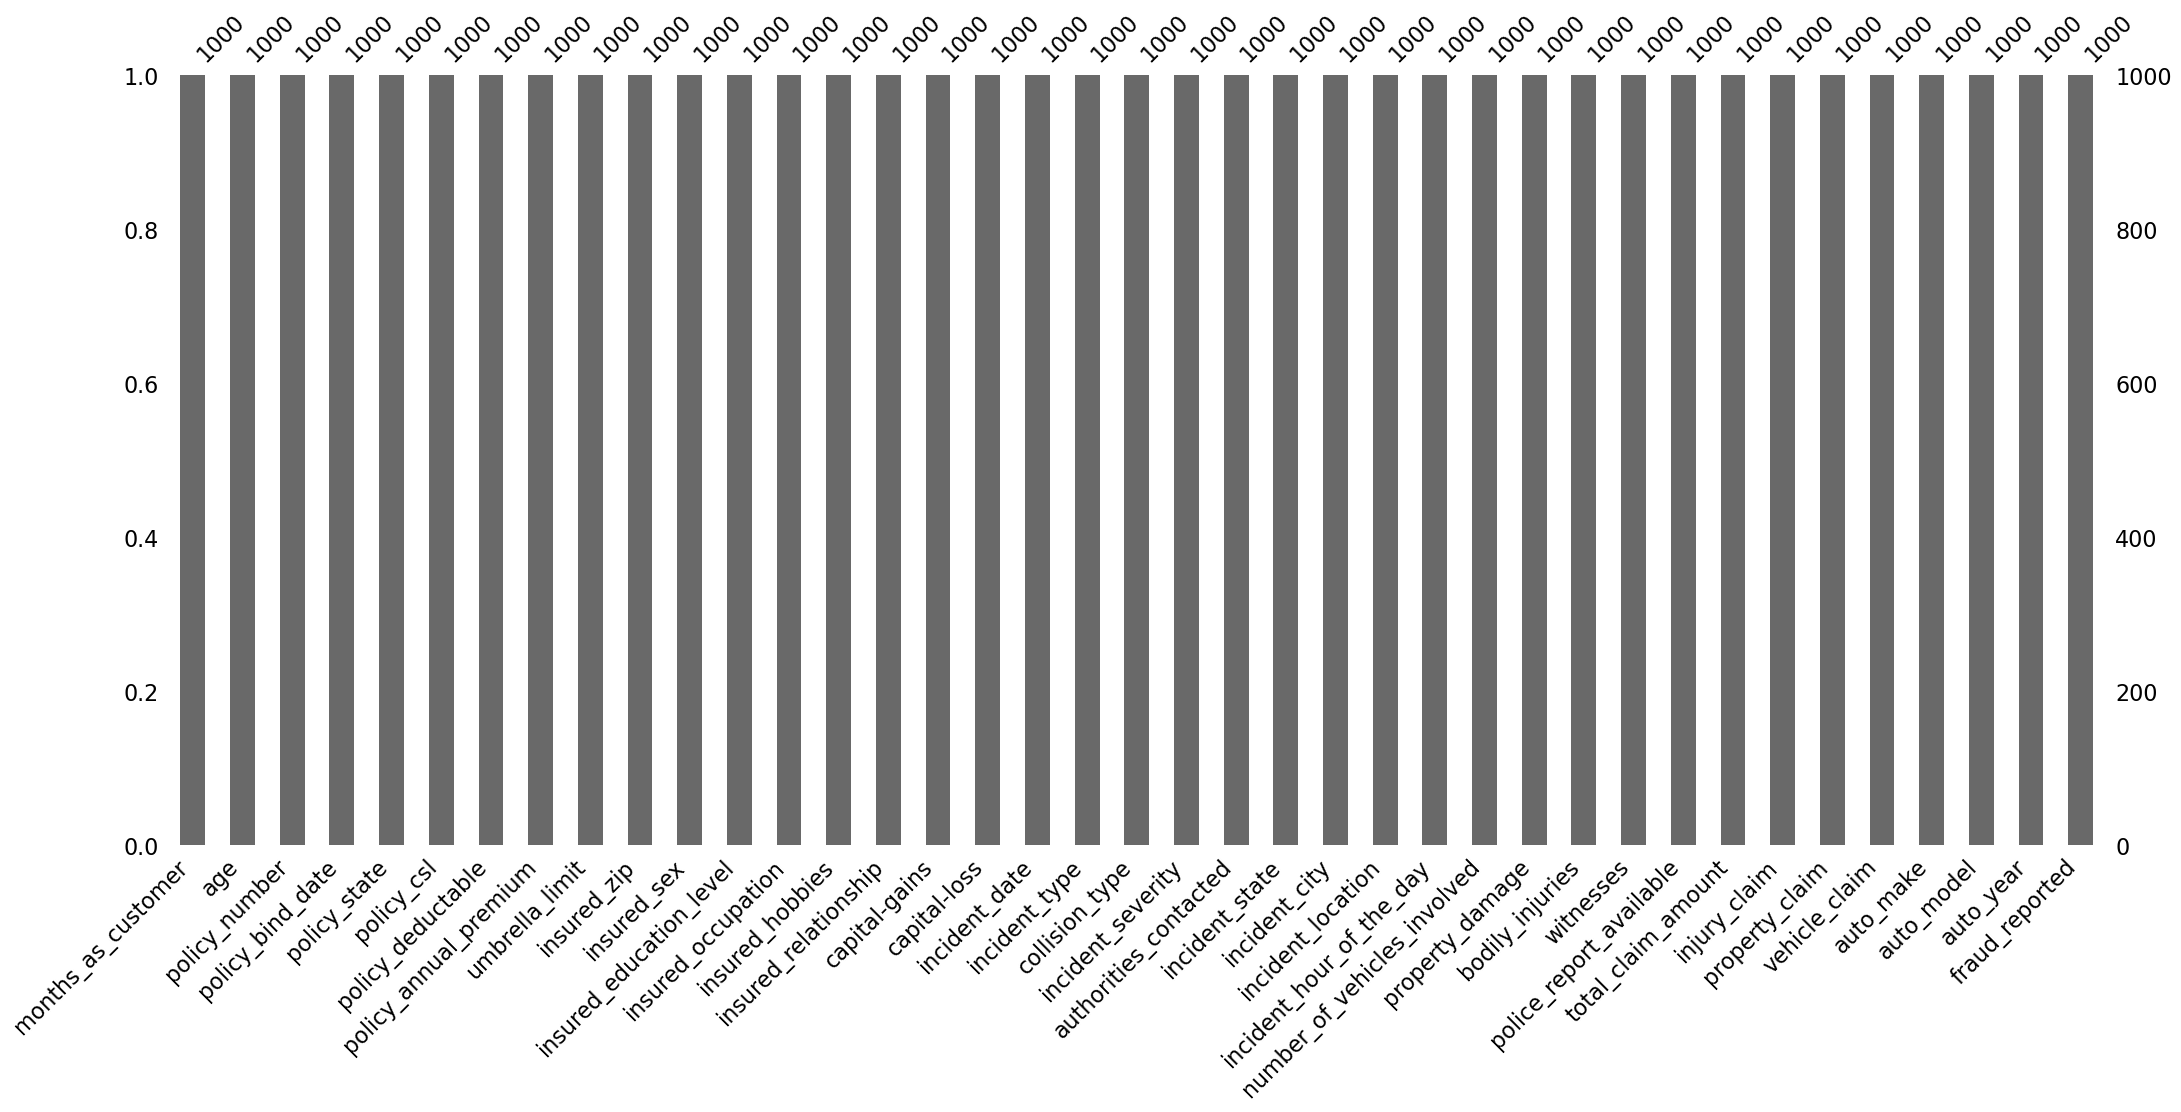

In [15]:
import missingno as msno

msno.bar(df)
plt.show()

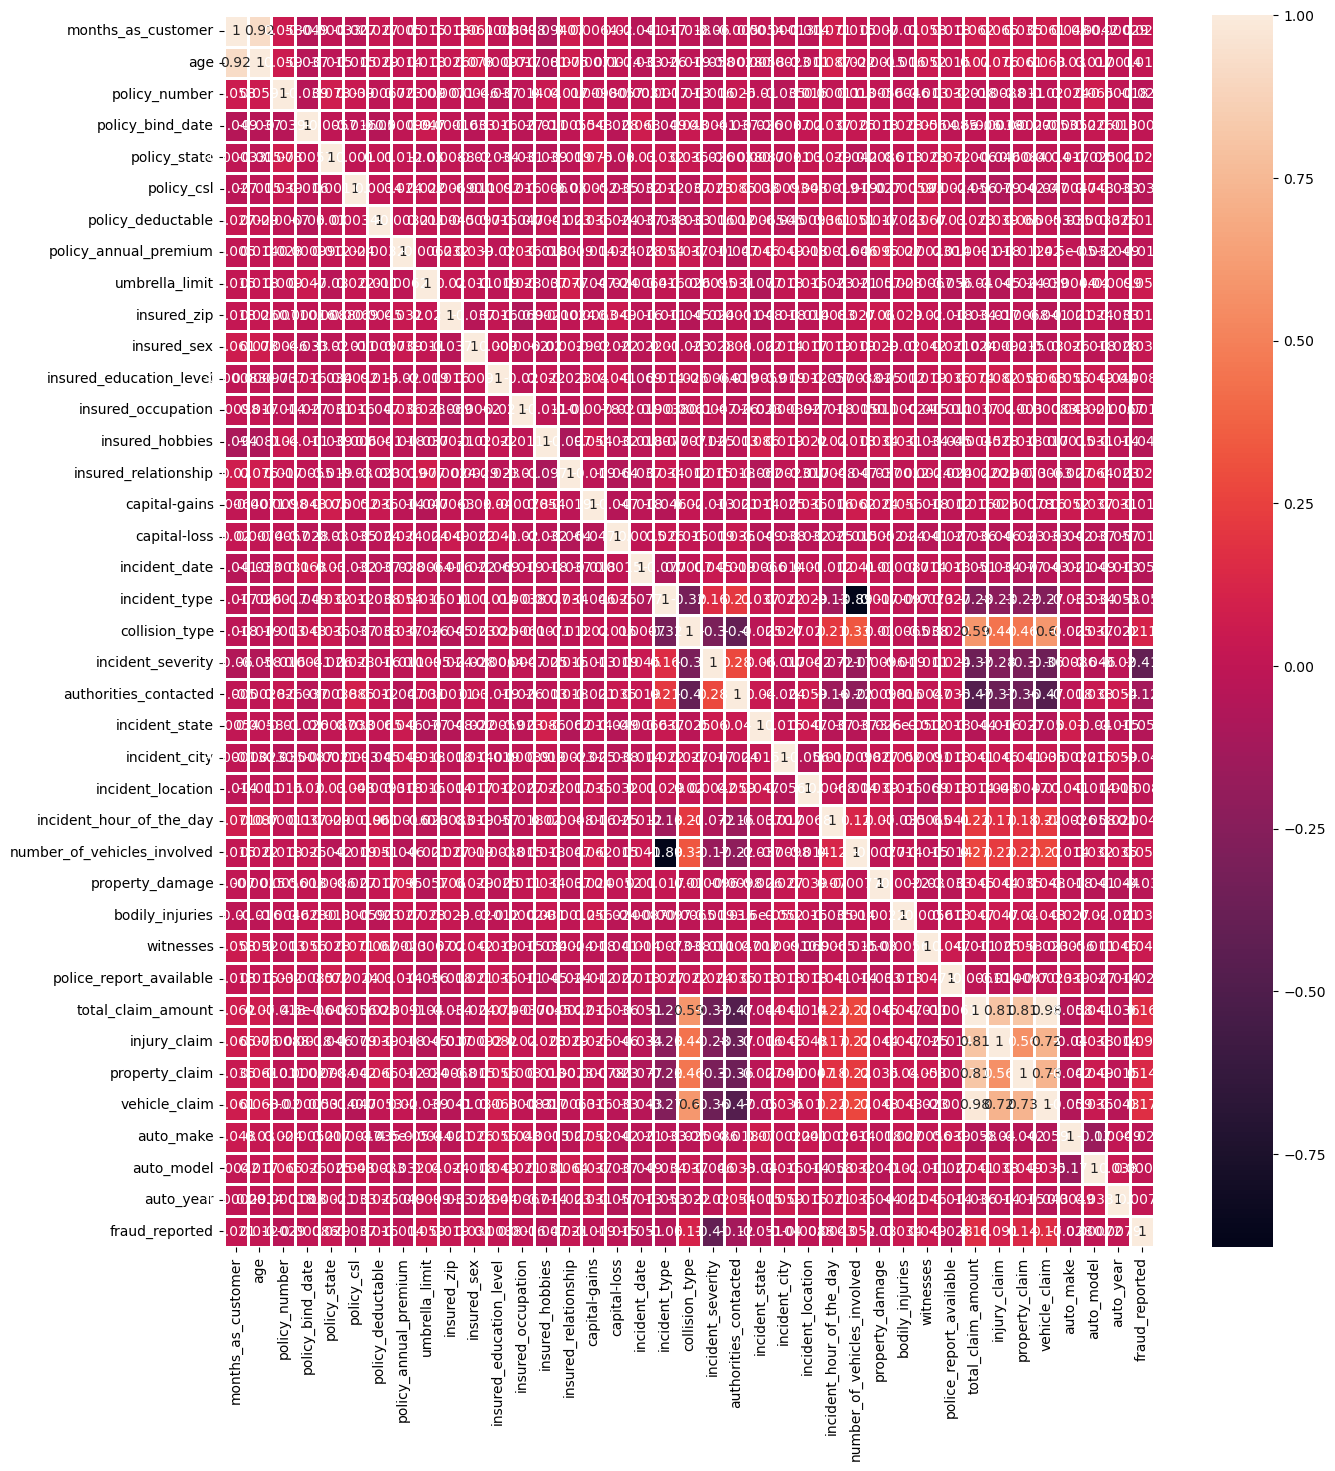

In [16]:
plt.figure(figsize= (15,16))
corr= df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [17]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [18]:
df.drop(columns=["age","total_claim_amount"])
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,940,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,635,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,413,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,19,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,922,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0


In [19]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [20]:
X

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,940,2,1,1000,1406.91,0,466132,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,342868,635,1,1,2000,1197.22,5000000,468176,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,687698,413,2,0,2000,1413.14,5000000,430632,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,227811,19,0,1,2000,1415.74,6000000,608117,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,367455,922,0,2,1000,1583.91,6000000,610706,...,0,1,1,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,67,2,2,1000,1310.80,0,431289,...,0,1,0,87200,17440,8720,61040,6,6,2006
996,285,41,186934,907,0,0,1000,1436.79,0,608177,...,2,3,0,108480,18080,18080,72320,13,28,2015
997,130,34,918516,514,2,1,500,1383.49,3000000,442797,...,2,3,2,67500,7500,7500,52500,11,19,1996
998,458,62,533940,831,0,2,2000,1356.92,5000000,441714,...,0,1,2,46980,5220,5220,36540,1,5,1998


In [21]:
y 

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

<Axes: xlabel='months_as_customer'>

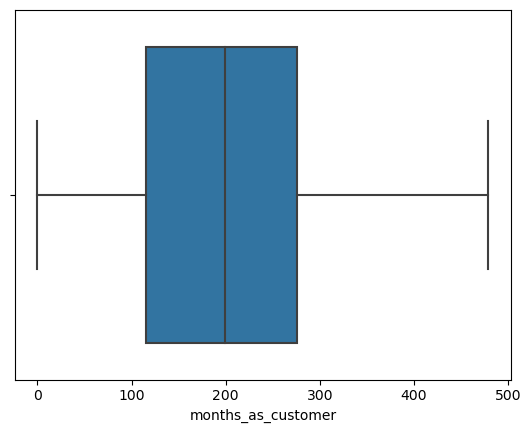

In [22]:
sns.boxplot(x=df['months_as_customer'])

In [23]:
plt_list=['months_as_customer','injury_claim','policy_annual_premium']


<Axes: >

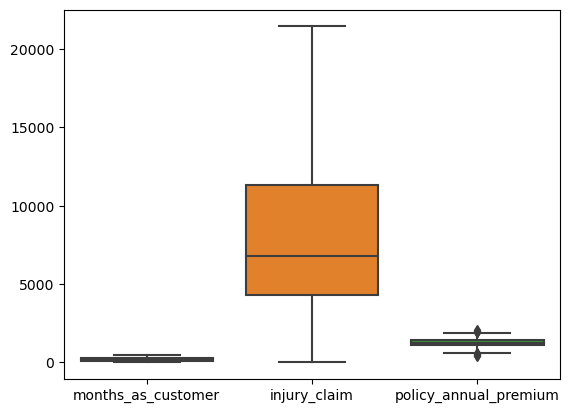

In [24]:
sns.boxplot(df[plt_list])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int32  
 4   policy_state                 1000 non-null   int32  
 5   policy_csl                   1000 non-null   int32  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int32  
 11  insured_education_level      1000 non-null   int32  
 12  insured_occupation           1000 non-null   int32  
 13  insured_hobbies    

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(X)
x_scale_df= pd.DataFrame(x_scale,columns=X.columns)
x_scale_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.078140,0.990836,-0.095953,1.712038,1.187173,0.060937,-0.222383,0.616705,-0.479476,-0.489529,...,0.009759,0.461838,1.270313,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,-0.183440
1,0.208995,0.334073,-0.791527,0.599844,-0.016856,0.060937,1.412784,-0.242521,1.697980,-0.461008,...,-1.210174,-1.338700,-1.198712,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,0.315491
2,-0.608002,-1.088913,0.550566,-0.209687,1.187173,-1.182668,1.412784,0.642233,1.697980,-0.984885,...,1.229693,1.362107,0.035801,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,0.315491
3,0.452355,0.224613,-1.239334,-1.646422,-1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,...,0.009759,0.461838,0.035801,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,1.479664
4,0.208995,0.552994,-0.695834,1.646400,-1.220886,1.304542,-0.222383,1.341980,2.133471,1.527808,...,-1.210174,-0.438431,0.035801,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.539740,-1.471388,1.187173,1.304542,-0.222383,0.222884,-0.479476,-0.975717,...,-1.210174,-0.438431,-1.198712,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,0.149180
996,0.704407,0.224613,-1.398429,1.591702,-1.220886,-1.182668,-0.222383,0.739141,-0.479476,1.492519,...,1.229693,1.362107,-1.198712,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,1.645974
997,-0.642767,-0.541611,1.448920,0.158613,1.187173,0.060937,-1.039966,0.520739,0.826998,-0.815138,...,1.229693,1.362107,1.270313,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,-1.513924
998,2.208028,2.523284,-0.047867,1.314565,-1.220886,1.304542,1.412784,0.411866,1.697980,-0.830250,...,-1.210174,-0.438431,1.270313,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,-1.181303


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x_scale_df, y, test_size=0.30)

In [28]:
x_train

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
235,1.947285,1.647599,-0.208200,0.278949,-0.016856,-1.182668,1.412784,1.023596,-0.479476,-0.667090,...,0.009759,-1.338700,-1.198712,0.901840,1.091845,-0.211428,1.032540,0.608503,1.408917,0.648112
204,0.321983,0.005692,1.364750,-0.763960,-1.220886,0.060937,1.412784,-0.877485,-0.479476,-0.517786,...,0.009759,0.461838,-1.198712,-1.276395,-0.654589,-1.094821,-1.335446,0.856466,-1.555900,-1.680234
805,0.747864,0.334073,-1.599002,1.598995,-0.016856,1.304542,-1.039966,-1.091749,-0.479476,-0.539944,...,-1.210174,-0.438431,0.035801,-0.180456,-0.539800,0.456302,-0.229326,0.856466,-1.466057,1.313353
363,0.687024,0.224613,0.079714,1.431254,1.187173,-1.182668,-1.039966,-0.251577,-0.479476,-0.348667,...,-1.210174,0.461838,-1.198712,-0.381303,-1.523707,-0.269491,-0.070401,0.360539,0.420645,0.980733
844,0.600110,0.881376,0.219766,1.303626,1.187173,1.304542,-0.222383,-0.276040,-0.479476,-0.605191,...,0.009759,1.362107,-1.198712,-0.491200,0.107939,-0.709114,-0.533403,0.112575,1.498760,1.479664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1.947285,2.194902,-0.959165,-0.319083,-0.016856,0.060937,-1.039966,0.360400,2.568963,-0.389105,...,1.229693,1.362107,0.035801,-1.753121,-1.257232,-1.399654,-1.768252,0.856466,-1.645743,1.313353
362,-0.468938,-0.979453,-0.746329,0.373759,-0.016856,-1.182668,-0.222383,0.350811,-0.479476,1.495980,...,-1.210174,0.461838,0.035801,-1.828912,-1.431466,-1.441128,-1.818578,0.856466,-1.555900,-1.014993
564,-0.208195,-0.651071,-1.684378,0.982731,-0.016856,1.304542,1.412784,-1.028236,-0.479476,-0.828059,...,1.229693,1.362107,1.270313,0.187130,0.841769,-0.337923,0.130374,0.112575,-0.208256,-0.516061
348,-1.642284,-0.541611,-0.571020,-0.548815,-1.220886,-1.182668,-0.222383,2.348842,-0.479476,-0.683876,...,0.009759,-1.338700,-1.198712,0.564191,0.997554,-0.259123,0.597085,-1.375206,-1.286371,0.648112


In [29]:
y_train


235    0
204    0
805    0
363    1
844    0
      ..
157    0
362    0
564    0
348    0
229    0
Name: fraud_reported, Length: 700, dtype: int32

# By using Support Vector Classifier

In [30]:
from sklearn.svm import SVC

In [31]:
svc = SVC(C=6,kernel='linear')
svc.fit(x_train,y_train)

SVC(C=6, kernel='linear')

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_train = svc.predict(x_train)
 
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
 
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :\n",acc_score)
 
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[477  44]
 [ 87  92]]
Accuracy Score is :
 0.8128571428571428
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       521
           1       0.68      0.51      0.58       179

    accuracy                           0.81       700
   macro avg       0.76      0.71      0.73       700
weighted avg       0.80      0.81      0.80       700



In [33]:
y_pred_test = svc.predict(x_test)
 
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n",cnf_matrix)
 
acc_score = accuracy_score(y_test, y_pred_test)
print("Accuracy Score is :\n",acc_score)
 
clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[203  29]
 [ 37  31]]
Accuracy Score is :
 0.78
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       232
           1       0.52      0.46      0.48        68

    accuracy                           0.78       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.77      0.78      0.77       300



In [34]:

print("predicted",y_pred_test,y)


predicted [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0] 0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32


# By using KNN model

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(x_train, y_train)



KNeighborsClassifier(n_neighbors=30)

In [42]:
y_pred_test = knn_model.predict(x_test)
 
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n",cnf_matrix)
 
acc_score = accuracy_score(y_test, y_pred_test)
print("Accuracy Score is :\n",acc_score)
 
clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n",clf_report)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

# By using Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)



DecisionTreeClassifier()

In [45]:
y_pred_test = dtc.predict(x_test)
 
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n",cnf_matrix)
 
acc_score = accuracy_score(y_test, y_pred_test)
print("Accuracy Score is :\n",acc_score)
 
clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[195  37]
 [ 31  37]]
Accuracy Score is :
 0.7733333333333333
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       232
           1       0.50      0.54      0.52        68

    accuracy                           0.77       300
   macro avg       0.68      0.69      0.69       300
weighted avg       0.78      0.77      0.78       300



In [49]:
y_pred_train = dtc.predict(x_train)
 
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
 
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :\n",acc_score)
 
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[521   0]
 [  0 179]]
Accuracy Score is :
 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       521
           1       1.00      1.00      1.00       179

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



# By using Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(x_train, y_train)



RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       n_estimators=140)

In [48]:
y_pred_test = rand_clf.predict(x_test)
 
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n",cnf_matrix)
 
acc_score = accuracy_score(y_test, y_pred_test)
print("Accuracy Score is :\n",acc_score)
 
clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[216  16]
 [ 41  27]]
Accuracy Score is :
 0.81
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       232
           1       0.63      0.40      0.49        68

    accuracy                           0.81       300
   macro avg       0.73      0.66      0.68       300
weighted avg       0.79      0.81      0.79       300



In [50]:
y_pred_train = rand_clf.predict(x_train)
 
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
 
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :\n",acc_score)
 
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[521   0]
 [  4 175]]
Accuracy Score is :
 0.9942857142857143
Classification Report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       521
           1       1.00      0.98      0.99       179

    accuracy                           0.99       700
   macro avg       1.00      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700

